In [5]:
import pandas as pd
import numpy as np 
from mlxtend.plotting import plot_decision_regions

In [2]:
# %pip install mlxtend

In [9]:
df = pd.DataFrame()
df['x1'] = [1,2,3,4,5,6,7,8,9]
df['x2'] = [5,3,6,4,1,4,9,2,3]
df['label'] = [1,1,0,1,0,1,1,0,0]


In [10]:
df


,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,4,1
4,5,1,0
5,6,4,1
6,7,9,1
7,8,2,0
8,9,3,0


In [11]:
import seaborn as sns

<Axes: xlabel='x1', ylabel='x2'>

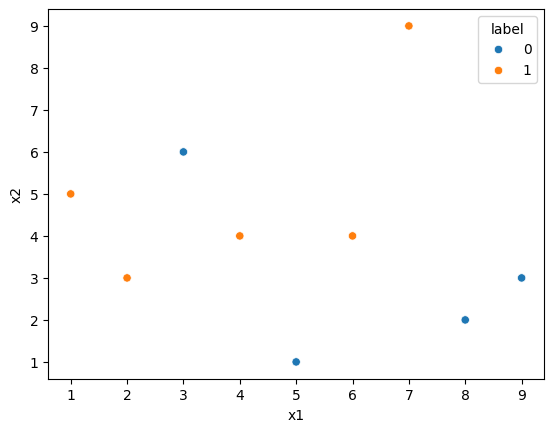

In [13]:
sns.scatterplot(x=df['x1'] , y = df['x2'], hue=df['label'], data = df)

In [16]:
df['weights'] = 1/df.shape[0] 
## Weigths for divide label ,  har label ke weigths decide kara 

In [15]:
df

,x1,x2,label,weights
0,1,5,1,0.111111
1,2,3,1,0.111111
2,3,6,0,0.111111
3,4,4,1,0.111111
4,5,1,0,0.111111
5,6,4,1,0.111111
6,7,9,1,0.111111
7,8,2,0,0.111111
8,9,3,0,0.111111


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=1)

In [23]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [24]:
## Step 2 - train 1st model 
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [25]:
from sklearn.tree import  plot_tree

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.5, '  False')]

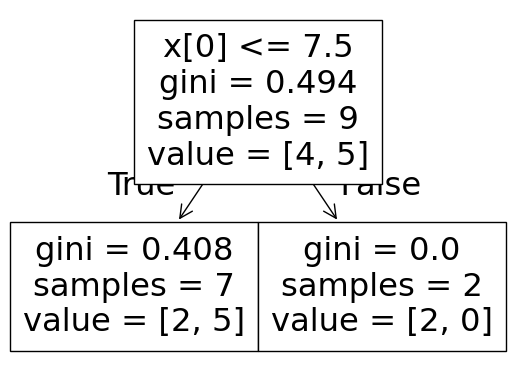

In [26]:
plot_tree(dt1)

<Axes: >

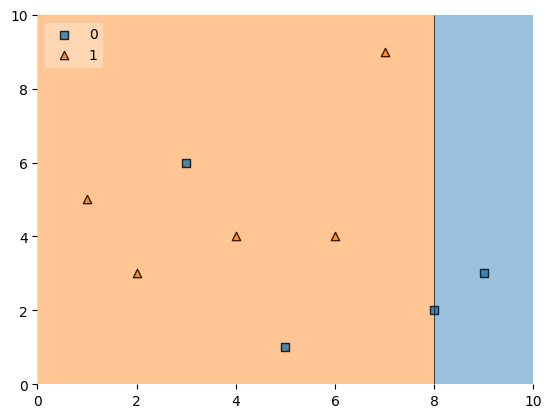

In [27]:
plot_decision_regions(x,y,clf = dt1,legend=2)

In [29]:
df['y_pred'] = dt1.predict(x)
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.111111,1
1,2,3,1,0.111111,1
2,3,6,0,0.111111,1
3,4,4,1,0.111111,1
4,5,1,0,0.111111,1
5,6,4,1,0.111111,1
6,7,9,1,0.111111,1
7,8,2,0,0.111111,0
8,9,3,0,0.111111,0


In [30]:
def calculate_model_weight (err):
  return 0.5*np.log((1-err)/(err))

In [31]:
## Step 3 - calculate model weight 
alpha1 = calculate_model_weight(0.3)

In [32]:
alpha1

np.float64(0.42364893019360184)

In [33]:
## Step - 4 update weigths 